In [97]:
# Data
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Model_selection
from sklearn.model_selection import train_test_split

# Machine learning
from sklearn.ensemble import RandomForestRegressor

import pickle

In [296]:
df = pd.read_csv('FinalData.csv') 

df.drop(['Degrees_C', 'Wind_Speed'], axis = 1, inplace = True)

df = pd.get_dummies(df, columns = ['date_month', 'date_day', 'date_dayofweek', 'date_hour'])

X = df.drop('TotalCount', axis = 1)
y = df['TotalCount']

df.head()

df['TotalCount'].mean()

923.2397719107114

In [287]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=340)

model = RandomForestRegressor(max_depth = 20)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=20)

In [288]:
# print(model.score(X_test, y_test))

model.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

array([4944.9])

In [375]:
import numpy as np 
import pandas as pd 
import joblib
import pickle
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
import streamlit as st
from PIL import Image
from datetime import date


# Load  model a 
model = pickle.load(open('model.pkl', 'rb'))

def data_preprocessor(df):
    """this function preprocess the user input
        return type: pandas dataframe
    """
    
    int_features = user_input_df.values[0]

    int_features[0] = int_features[0] - 1
    
    int_features[1] = int_features[1] - 1

    dummy_features = []

    month = list(range(12))
    day_of_month = list(range(31))
    hour = list(range(24))
    day_of_week = list(range(7))

    # Get dummy data
    dummy_month = pd.get_dummies(month)
    dummy_day_of_month = pd.get_dummies(day_of_month)
    dummy_hour = pd.get_dummies(hour)
    dummy_day_of_week = pd.get_dummies(day_of_week)

    # Print dummy data for input
    dummy_features.extend(dummy_month[int_features[0]])
    dummy_features.extend(dummy_day_of_month[int_features[1]])
    dummy_features.extend(dummy_day_of_week[int_features[2]])
    dummy_features.extend(dummy_hour[int_features[3]])

    # # final array
    final = np.array(dummy_features)

    return final


def get_user_input():
    """
    this function is used to get user input using sidebar slider and selectbox 
    return type : pandas dataframe
    """
    
    city = st.sidebar.selectbox("Select city ", ("York City", ))
    
    date_input = st.sidebar.date_input('Date input', min_value = date.today())
    
    time_input = st.sidebar.slider('Time input', 0, 23, 1)
    
    input_month = date_input.month
    input_date_of_month = date_input.day
    input_day_of_week = date_input.weekday()
    input_hour = time_input
    
    features = {'month': input_month,
            'date_of_month': input_date_of_month,
            'day_of_week': input_day_of_week,
            'hour': input_hour}
    
    data = pd.DataFrame(features, index=[0])

    return data

user_input_df = get_user_input()
processed_user_input = data_preprocessor(user_input_df)

prediction = model.predict([processed_user_input])

#####################################################################################
# Frontend

st.title('Welcome to Foreseer')

st.header('Live prediction ' )

above_text = 'That is above the average 923 in York City'
below_text = 'That is below the average 923 in York City'

if prediction > 923:
    st.subheader('There will be ' + str(int(prediction))  + ' people in York City given your input data!')
    st.subheader(above_text)            
else:
    st.subheader('There will be ' + str(int(prediction))  + ' people in York City given your input data!')
    st.subheader(below_text) 

image = Image.open('YorkCity.jpg')
st.image(image, caption = 'York City', use_column_width = True)

print(prediction)

[332.49976511]


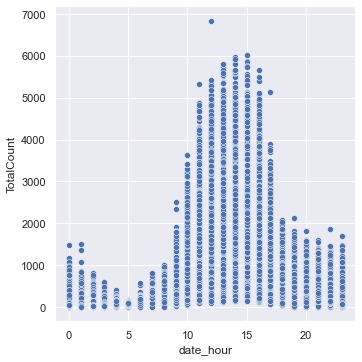

In [407]:
import seaborn as sns

data = pd.read_csv('FinalData.csv')
chart_data = data[['TotalCount', 'date_hour']]

x = data['date_hour']
y = data['TotalCount']

sns.set_theme(style="darkgrid")

sns.relplot(x=x, y=y)